In [1]:
import numpy as np

from ipywidgets import interact
from matplotlib import pyplot as plt

%matplotlib inline

# Q1

In [2]:
# generate data (X, y)
N = 50 # number of data points
D = 2 # number of dimensions
X = 0.5 * np.random.randn(N, D) # input data
true_w = np.random.rand(D)
true_b = np.random.rand()
noise = 0.1 * np.random.randn(N)
y = X @ true_w + true_b + noise # true function is linear plus some Gaussian noise

# generate random invertible matrix
# this can be done by generating a lower triangular matrix L and 
# an upper triangular matrix U and setting A = LU
L = np.tril(np.random.randn(D, D)) 
U = np.triu(np.random.randn(D, D))
A = L @ U

# generate Bob's features using his invertible matrix
phi = X @ A.T # matrix multiplication is the other way around since the rows of X contain our input data points

# add column of 1s to feature matrices so that least squares fit uses a bias
X = np.hstack((X, np.ones((N, 1))))
phi = np.hstack((phi, np.ones((N, 1))))

# fit 
alice_fit = np.linalg.lstsq(X, y, rcond=None)
bob_fit = np.linalg.lstsq(phi, y, rcond=None)


# get weights and biases from fit
alice_weight = alice_fit[0][:2]
alice_bias = alice_fit[0][-1]
bob_weight = bob_fit[0][:2]
bob_transformed_weight = A.T @ bob_weight
bob_bias = bob_fit[0][-1]

# check everything is as it should be 
print("True weight is: {:}, true bias is: {:}".format(true_w, true_b))
print("Alice weight is {:}, Alice bias is {:}".format(alice_weight, alice_bias))
print("Bob transformed weight is {:}, Bob bias is {:}".format(bob_transformed_weight, bob_bias))

assert np.allclose(bob_transformed_weight, alice_weight) and np.allclose(bob_bias, alice_bias)

True weight is: [0.18800512 0.31161704], true bias is: 0.9945880692466806
Alice weight is [0.14879423 0.32294327], Alice bias is 0.9634723696174502
Bob transformed weight is [0.14879423 0.32294327], Bob bias is 0.9634723696174508


# Q2

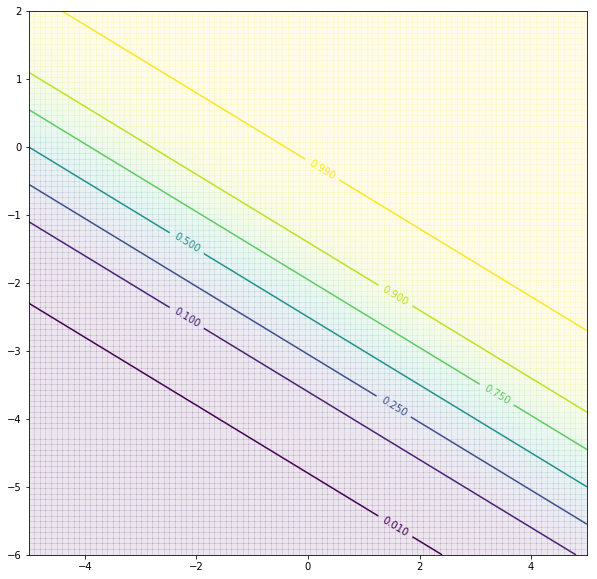

In [3]:
v = np.array([1, 2])
b = 5

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def phi(x):
    return sigmoid(x @ v.T + b)

x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-6, 2, 100))
data = np.vstack((x.reshape(-1), y.reshape(-1))).T

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(x, y, phi(data).reshape(x.shape), alpha=0.1)
contours = ax.contour(x, y, phi(data).reshape(x.shape), 
                      levels=np.array([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]))
ax.clabel(contours, contours.levels);

# Q3

In [4]:
def plot_basis_functions(h=0.2):
    k = np.arange(1, 102)
    c = (k - 51) * h / np.sqrt(2)
    x = np.linspace(-10, 10, 1000)
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    for ck in c: # plot each basis function
        phik = np.exp(-((x - ck) / h)**2)
        ax.plot(x, phik, color='C0')
    ax.fill_between(np.linspace(-1, 1, 50), 0, 1, color='k', alpha=0.3) # shade range of input data

interact(plot_basis_functions, h=(0, 2, 0.1));

interactive(children=(FloatSlider(value=0.2, description='h', max=2.0), Output()), _dom_classes=('widget-inter…